In [1]:
import os
import random
import numpy as np
import pandas as pd 
from skimage import io
from skimage import color
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
# import seaborn as sns
# from dask.array.image import imread
# from dask import bag, threaded
# from dask.diagnostics import ProgressBar
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
#Use the generated model 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


In [4]:
from tensorflow.keras.models import model_from_json

tags = { "C0": "safe",
"C1": "txt-R",
"C2": "talk-R",
"C3": "txt-L",
"C4": "talk-L",
"C5": "radio",
"C6": "drink",
"C7": "reach",
"D" : "Distracted"}

with open('mobilenetv1_29mar_8class_moreaug.json','r') as f:
    model = model_from_json(f.read())

model.load_weights('models/mobilenetv1_29mar_8class_moreaug.h5')

sgd = optimizers.SGD(lr = 0.005) # try 0.01 - didn't converge and 0.005 , 0.001 best acc of 11%

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()




Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128   

In [ ]:
image_array = []

src = 'distracted_subha_new.mp4'
cap = cv2.VideoCapture(src)
# start_time = time.time()

# url = "http://56.76.210.13:8080/shot.jpg"

while(cap.isOpened()):
    ret,frame = cap.read()
    if ret == True:
        org = frame
        frame = cv2.resize(frame,(224,224))
        predict_test = np.array(frame).reshape(1,224,224,3).astype('float32')
        prediction = model.predict(predict_test)
        prediction = list(prediction[0])
        safe_pred = round(prediction[0]*100,2)
        dist_pred = round(max(prediction)*100,2)
        predicted_class = 'C'+str(prediction.index(max(prediction)))
        if (predicted_class == 'C0' or predicted_class == 'C9'):
            predicted_class = 'C0'
        else:
            cv2.putText(org	, "Distracted " , (900,100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2 )
        
        cv2.putText(org, tags[predicted_class] , (900,200), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2 )
        image_array.append(org)

        
out = cv2.VideoWriter('Predicted_distracted_subha_new.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, (1920,1080))
 
for i in range(len(image_array)):
    out.write(image_array[i])
out.release()
    

In [ ]:
# test = []

# for img in test_image:
#     test.append(img)




# predict_test = np.array(test).reshape(-1,224,224,3).astype('float32')
# prediction = model.predict(predict_test)
# print(prediction[0])

# print(len(test_image))
# # labels is the image array
# i = 0
# fig, ax = plt.subplots(20, 1, figsize = (500,500))

# # for i in range(len(test_image)):
# # for i in range(len(test_image)):
# for i in range(len(test_image)):
#     safe_pred = round(prediction[i][0]*100,2)
#     dist_pred = round(max(prediction[i])*100,2)
#     if ( safe_pred >= dist_pred and prediction[i][9] == max(prediction[i])*100,2 ):
#         predicted_class = 'C0'
#     else:
#         cv2.putText(clean_image[i], "Distracted: ", (800,900), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 2 )
#         predicted_class = 'D'
#     print("safe: ", safe_pred)
#     print("Dist: ",dist_pred)
# #     predicted_class = 'C'+str(np.where(prediction[i] == max(prediction[i]))[0][0])
# #     print(predicted_class)
# #     cv2.putText(clean_image[i],  tags[predicted_class] , (800,700), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 2 )
# # #     cv2.putText(clean_image[i], "Safe: "  , (800,800), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 2 )
# # #     cv2.putText(clean_image[i], "Distracted: ", (800,900), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 2 )
# #     ax[i].set_title(tags[predicted_class])
# #     ax[i].imshow(clean_image[i])
# #     plt.show



[4.9751647e-02 1.5957745e-02 2.9861992e-03 6.3713474e-06 1.8861331e-04
 1.0677145e-03 7.7139391e-03 7.5386517e-05 3.5094358e-02 8.8715804e-01]
20
safe:  4.98
Dist:  88.72
safe:  0.0
Dist:  73.78
safe:  2.88
Dist:  36.7
safe:  4.96
Dist:  67.72
safe:  2.13
Dist:  73.25
safe:  0.01
Dist:  67.63
safe:  0.0
Dist:  62.45
safe:  2.57
Dist:  82.45
safe:  6.44
Dist:  88.79
safe:  0.49
Dist:  62.25
safe:  1.52
Dist:  33.59
safe:  0.49
Dist:  82.1
safe:  0.1
Dist:  54.17
safe:  0.29
Dist:  48.22
safe:  5.63
Dist:  49.64
safe:  4.84
Dist:  51.35
safe:  0.03
Dist:  86.36
safe:  2.11
Dist:  96.86
safe:  0.03
Dist:  97.68
safe:  0.21
Dist:  68.11


In [ ]:
# # video = mpy.VideoFileClip('distracted_sanju_full.mp4')
# # cnt = 0
# # print(video.fps * video.duration)
# # while(1):
# #     frame = video.get_frame(cnt)
# # #     print(frame.shape)
# #     cv2.imwrite('sanju_frames_full_mp/'+ str(cnt) + '.jpg',frame)
# #     cnt += 1
# # #     if(cnt % 10 == 0):
# # #         break
    

# cap = cv2.VideoCapture('distracted_sanju_allclass.mp4')
# print(cap.isOpened())
# cnt = 1
# total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# fps = int(cap.get(cv2.CAP_PROP_FPS))
# print(total)
# print(fps)
# print(total/fps)
# # cap.set(cv2.CAP_PROP_POS_FRAMES, 3000)
# # while cap.isOpened():
# #     ret, frame = cap.read()
# #     if ret:
# #         cv2.imwrite('sanju_frames_full/'+ str(cnt) + '.jpg',frame)
# #         cnt += 1



3166
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)


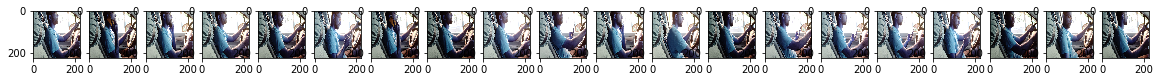

In [4]:
# from natsort import natsorted
# clean_image = []
# test_image = []

# fig, ax = plt.subplots(1, 20, figsize = (20,20))

# files = natsorted(os.listdir('sanju_frames_allclass'))
# print(len(files))
# nums = np.random.randint(low=1, high=len(files), size=20)
# i = 0
# # j = 1000
# # for i in range(len(files)):
# for i in range(20):
# #     print(nums[i])
#     img = cv2.imread('sanju_frames_allclass/'+files[nums[i]])
#     img = cv2.flip(img, 1)
# #     img = cv2.flip(img, 1)
#     clean_image.append(img)
#     print(img.shape)
# #     print(img.shape)
# #     cv2.rectangle(img,(30,100),(1400,1080),(255,0,0),2)
#     img = img[50:,120:-50]
    
#     img = cv2.resize(img,(224,224))
#     test_image.append(img)
#     ax[i].imshow(img,cmap = 'gray')
#     plt.show


# # test = []

# # for img in test_image:
# #     test.append(img)

# # print(len(clean_image))
# # print(len(test_image))

In [2]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser


In [26]:
from keras.preprocessing.image import ImageDataGenerator
imgPath = os.path.join("../statefarm_dataset/train/c6/img_20687.jpg")
image=cv2.imread(imgPath)
image=np.expand_dims(image, axis=0)
datagen = ImageDataGenerator(
    rotation_range=30,
    height_shift_range=0.1,
    width_shift_range=0.1,
    featurewise_std_normalization=True,
    featurewise_center=True,
    brightness_range=[0.2,1.0],
    zoom_range=[0.5,1.0],
    
    )
imageGen=datagen.flow(image,batch_size=1)

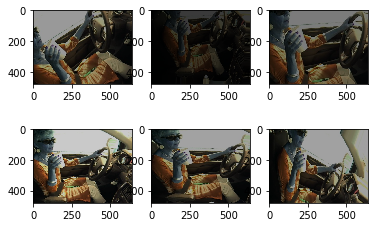

In [23]:
for i in range(6):
    nextImg=imageGen.next()
    plt.subplot(230 + 1 + i)
    image = nextImg[0].astype('uint8')
    plt.imshow(image)
plt.show()